**This notebook visualizes the values of the LM damping factors learned by PixLoc (Figure 8).**

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pixloc.pixlib.utils.experiments import load_experiment
from pixloc import run_CMU, run_Aachen

# Read the damping values from the checkpoints

In [ ]:
experiments = {
    'CMU': run_CMU.experiment,
    'MD': run_Aachen.experiment,
}
dampings = {}
for k, exper in experiments.items():
    print('Exeperiment', exper)
    optimizer = load_experiment(exper).eval().optimizer
    dampings[k] = []
    for i in range(3):
        with torch.no_grad():
            damp = optimizer[i].dampingnet().cpu().numpy()
        print(damp)
        dampings[k].append(damp)

# Plot the values at the coarse level

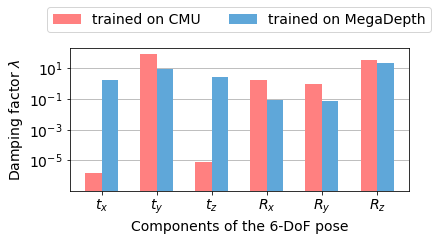

In [8]:
mpl.rc('font', size=14)
plt.figure(figsize=(6, 3))
w = 0.3  # bar width
idx = -1  # coarse level

args = dict(width=w, zorder=10)
plt.bar(np.arange(6)-w/2, dampings['CMU'][idx], color=(1, .5, .5), label='trained on CMU', **args)
plt.bar(np.arange(6)+w/2, dampings['MD'][idx], color='#5fa7d9', label='trained on MegaDepth', **args)

plt.xlabel('Components of the 6-DoF pose')
plt.xticks(range(6), ('$t_x$', '$t_y$', '$t_z$', '$R_x$', '$R_y$', '$R_z$'))

plt.yscale('log')
plt.ylabel('Damping factor $\lambda$')
plt.ylim([1.1e-7, 200])
plt.tight_layout()
plt.grid(axis='y')
plt.gca().set_zorder(20)
plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.2), loc='center');

# plt.savefig('learned_damping_factors.pdf', bbox_inches='tight', pad_inches=0)